# Camera Sticker

## 사진 준비하기

In [59]:
## conda install -c conda-forge dlib로 dlib을 설치해야한다.

import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

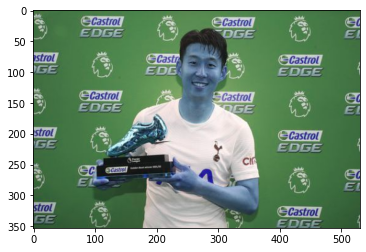

In [60]:
##open cv로 불러오기

my_image_path = 'camera_sticker/images/son_epl2.jpeg'
img_bgr = cv2.imread(my_image_path)    
img_show = img_bgr.copy()      
plt.imshow(img_bgr)
plt.show()

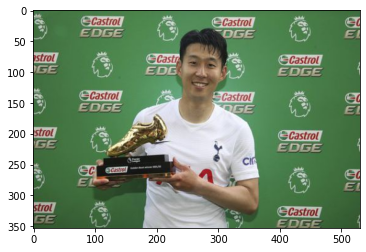

In [61]:
# RGV로 변경

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## Face Detection

rectangles[[(237, 63) (312, 138)]]


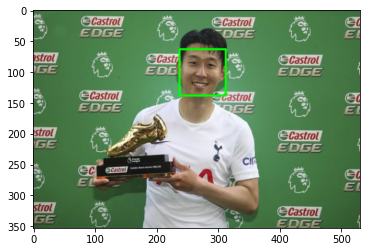

In [62]:
# detector 선언

detector_hog = dlib.get_frontal_face_detector()  
dlib_rects = detector_hog(img_rgb, 1)   
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## Face Landmark

In [63]:
model_path = 'camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [64]:
# face landmark 찾기

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


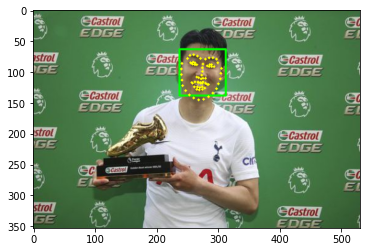

In [65]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 스티커 적용하기

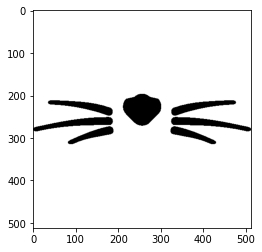

In [66]:
# 이미지 읽기
sticker_path = 'camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)   
plt.imshow(img_sticker)
plt.show()

(273, 105)
(x,y) : (273,105)
(w,h) : (76,76)
(x,y) : (235,67)
(x,y) : (235,67)
(76, 76, 3)


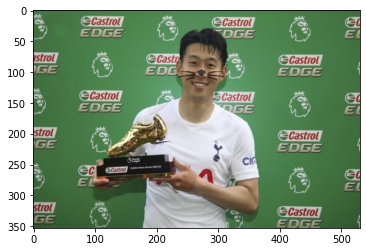

In [67]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
  print (landmark[30]) # 코의 index는 30 입니다
  x = landmark[30][0]
  y = landmark[30][1]
  w = h = dlib_rect.width()
  print ('(x,y) : (%d,%d)'%(x,y))
  print ('(w,h) : (%d,%d)'%(w,h))


  refined_x = x - w // 2
  refined_y = y - h // 2
  print ('(x,y) : (%d,%d)'%(refined_x, refined_y))


  if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
  if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0
  print ('(x,y) : (%d,%d)'%(refined_x, refined_y))


  img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
  img_sticker = cv2.resize(img_sticker, (w,h))
  print (img_sticker.shape)


  alpha = 0.4  # 투명도
  sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
  img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, alpha, np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8), 1-alpha, 0)  # 컬러 값 0(검정색)
  plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))

plt.show()

----------------------------------------------------------------------------------------------------------------------

## 새로운 사진 시도 (각도와 회전해보기)

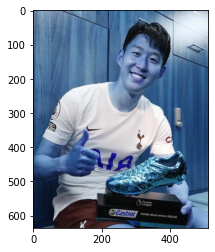

In [68]:
## conda install -c conda-forge dlib로 dlib을 설치해야한다.

import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib 

# 이미지 읽기
my_image_path = 'camera_sticker/images/son_epl.jpeg'
img_bgr = cv2.imread(my_image_path)    
img_show = img_bgr.copy()      
plt.imshow(img_bgr)
plt.show()

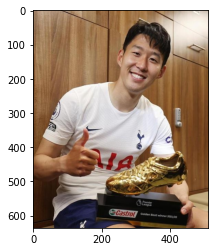

In [69]:
# RGB로 변경

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [70]:
# detector 선언

detector_hog = dlib.get_frontal_face_detector() 
dlib_rects = detector_hog(img_rgb, 1)  

rectangles[[(253, 96) (382, 225)]]


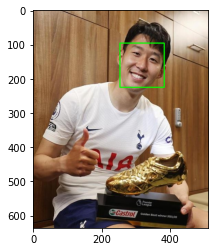

In [71]:
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [72]:
model_path = 'camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [73]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


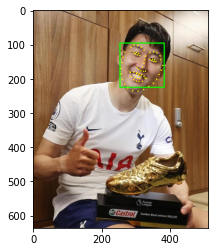

In [36]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

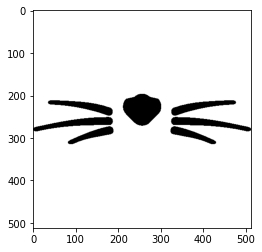

In [74]:
# 이미지 읽기

sticker_path = 'camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)   
plt.imshow(img_sticker)
plt.show()

기울어진 각도: -45.0
<function getAngle at 0x7fd1d2677ca0>
(319, 166)
(x,y) : (319,166)
(w,h) : (130,130)
(x,y) : (254,101)
(x,y) : (254,101)
(130, 130, 3)


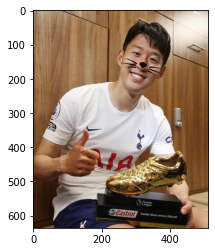

In [78]:
import math


# 각도 구하기 (tan_theta = dx/dy; theta = np.arctan(tan_theta) 활용 으로 해결)
height, width, channel = img_sticker.shape
ang = math.atan(h/w)/math.pi*180
print("기울어진 각도:", -round(ang,2))

def getAngle(start, end):
  dx = end[0]-start[0]
  dy = end[1]-start[1]

  tan_theta = dx/dy
  theta = np.arctan(tan_theta)
  
  degree = theta * (180.0 / math.pi)  

  return degree
print (getAngle)

# 이미지 회전
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR,borderValue=(255,255,255))
  return result


for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
  print (landmark[30]) # 코의 index는 30 입니다
  x = landmark[30][0]
  y = landmark[30][1]
  w = h = dlib_rect.width()
  print ('(x,y) : (%d,%d)'%(x,y))
  print ('(w,h) : (%d,%d)'%(w,h))


  refined_x = x - w // 2
  refined_y = y - h // 2
  print ('(x,y) : (%d,%d)'%(refined_x, refined_y))


  if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
  if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0
  print ('(x,y) : (%d,%d)'%(refined_x, refined_y))


  img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
  img_sticker = cv2.resize(img_sticker, (w,h))
  print (img_sticker.shape)


  start = landmark[30]
  end = landmark[27]
  img_sticker = rotate_image(img_sticker, getAngle(start, end))


  alpha = 0.4  # 투명도
  sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
  img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, alpha, np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8), 1-alpha, 0)  # 컬러 값 0(검정색)
  plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))

plt.show()

In [76]:
height, width, channel = img_sticker.shape
ang = math.atan(h/w)/math.pi*180
print("이미지가 기울어진 각도:", -round(ang,2))

이미지가 기울어진 각도: -45.0


----------------------------------------------------------------------------------------------------------------------

# 회고

### 
간단한 회고는 아래와 같다.
 
 손흥민의 여러 사진으로 시도해보았고, 총 2가지 사진을 스티커 적용해보았다. 멀리서 촬영된 사진이나 얼굴이 살짝 가려지거나 윤곽이 희미한 경우들에는 인식하지를 못했다. 이목구비와 윤곽 조건에만 충족한다면 제대로 인식하고 작동하는 것으로 보여진다. 또, 두번째 사진 시도로 각도와 회전을 하기 위해 여러 시도를 해보았다. 여러 식들을 이용해 각도를 구하고 그 각도값을 회전시키는 것을 새로이 적용해보았다. 





또한, LMS에서 제시한 문제점에 대한 답은 이렇다.

1. 얼굴 각도에 따라 스티커를 회전시켜야 한다. tanθ(=dx/dy)로 각도를 구하고 numpy.arctan(tanθ)로 θ을 구한다. 그리고  radian으로 180/math.pi 곱해서 degree 값을 구한다. 최종적으로 나온 degree 값으로 회전시킨다.


2. 옆으로 누운 자세나 너무 멀리서 촬영하면 얼굴 윤곽과 이목구비를 인식이 잘 안된다. 옆으로 누운 자세 또한 마찬가지이다. 왜냐하면, 이목구비와 윤곽이 잡히지 않아서 스티커를 붙일수가 없기 때문이다.


3. 아마도 다른 스티커로 바꿀 때에도 느리다면 사용자들은 답답해 할 것이다. 실행 속도가 빠르면 빠를수록 좋을 것 같다. 


4. 이것 또한 정확하면 정확할수록 좋을 것 같다. 하지만, 이목구비와 윤곽 조건에만 충족한다다면 작동하는 성능 정도만 유지해도 큰 문제가 없을 것 같다. 
